In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns

Import the dataset

In [ ]:
data = pd.read_csv('/content/Mall_Customers.csv')

To print summary of the dataset

In [ ]:
print("Data Summary:")
print(data.describe())

Data Summary:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


To print info about the dataset

In [ ]:
print("\nData Info:")
print(data.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


Converting Gender column to numerical attributes

In [ ]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

To visualize the distribution of each feature using bar plots.



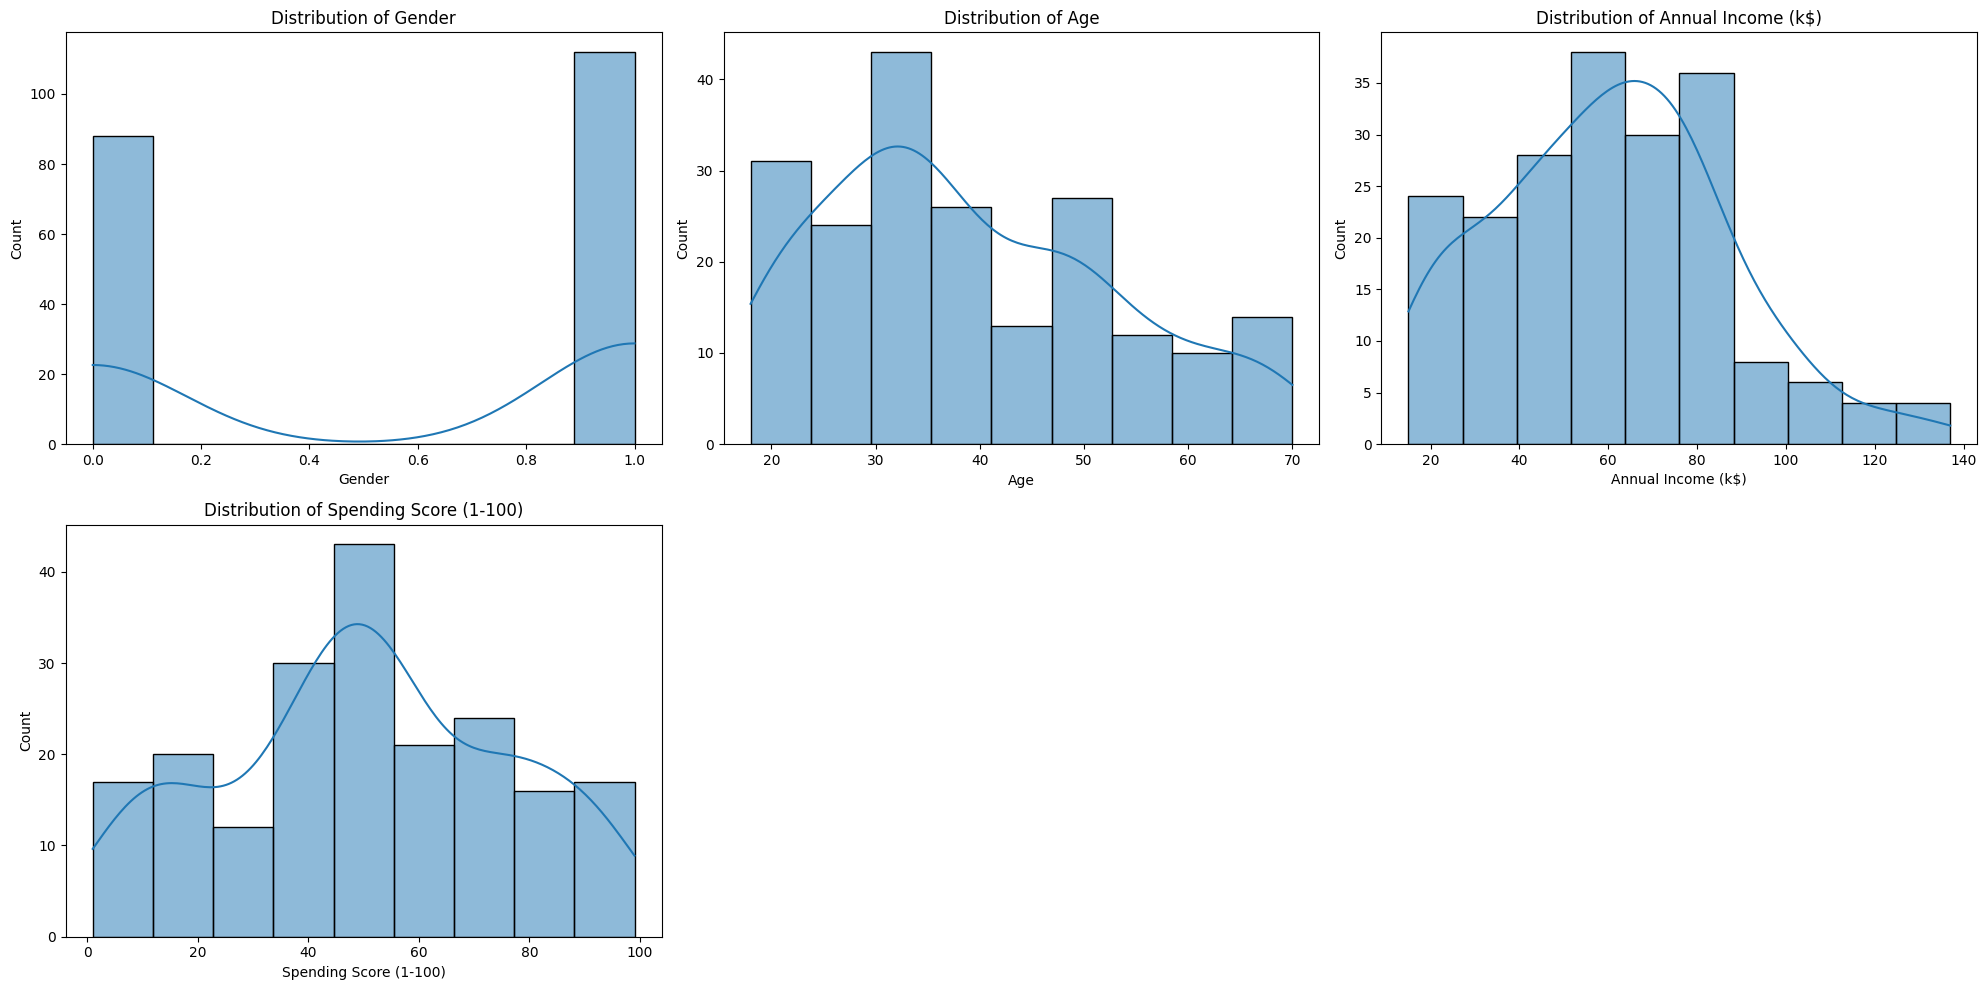

In [ ]:
plt.figure(figsize=(20, 10))
for i, column in enumerate(data.columns[1:], 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

To perform Normalization

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

To perform K-Means Clustering.
To identify optimal value of 'K': silhouette method and Elbow method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

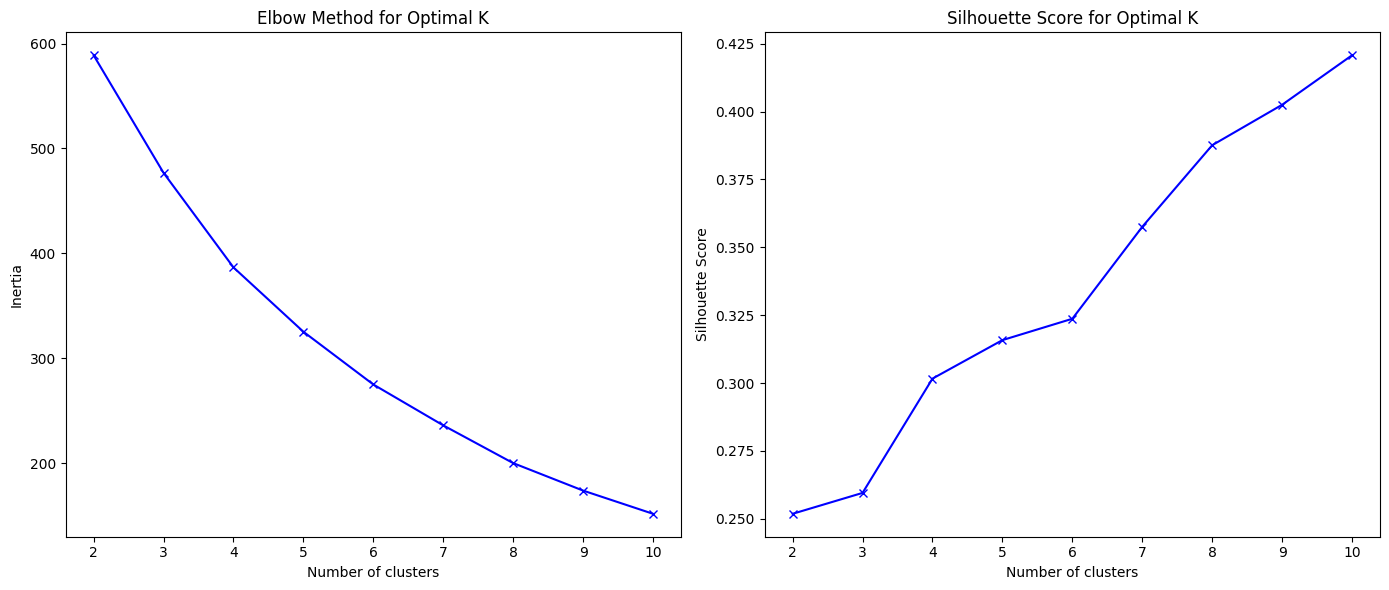

In [ ]:
inertia = []
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')

plt.tight_layout()
plt.show()



Consider K value '5'

In [ ]:
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0).fit(data_scaled)
data['Cluster_KMeans'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


To anaylze the clusters

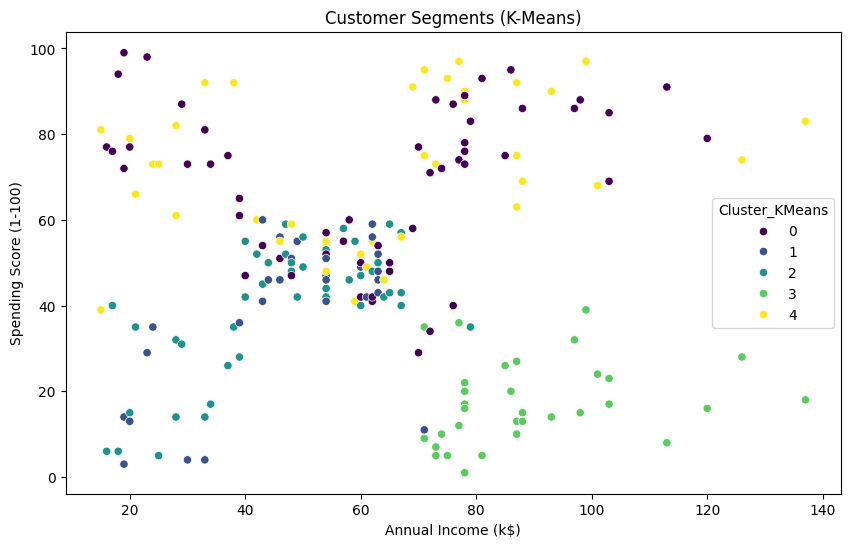

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_KMeans', palette='viridis')
plt.title('Customer Segments (K-Means)')
plt.show()


To display the cluster centers

In [ ]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers = pd.DataFrame(centers, columns=['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
print("K-Means Cluster Centers:")
print(cluster_centers)

K-Means Cluster Centers:
     Gender        Age  Annual Income (k$)  Spending Score (1-100)
0  1.000000  28.345455           60.800000               68.654545
1  0.000000  57.214286           46.785714               38.714286
2  1.000000  48.720930           46.186047               39.674419
3  0.424242  40.727273           89.030303               16.939394
4  0.000000  28.536585           61.804878               71.097561


Visualize the cluster centers

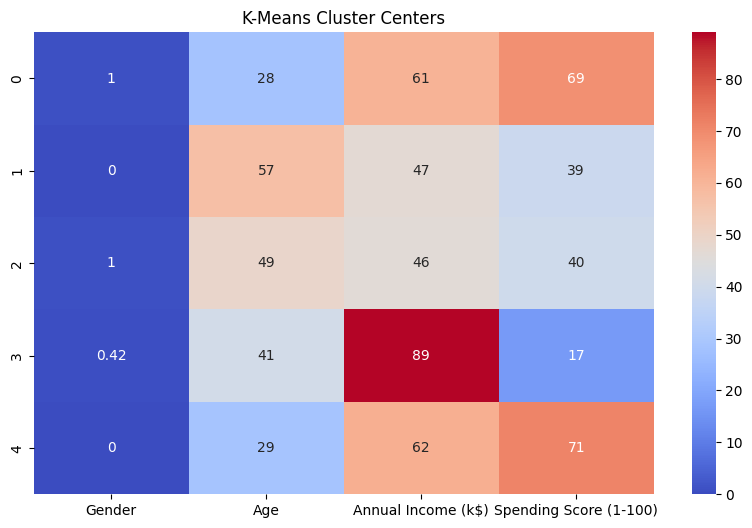

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_centers, annot=True, cmap='coolwarm', xticklabels=['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
plt.title('K-Means Cluster Centers')
plt.show()
# Hierarchical Clustering
Z = linkage(data_scaled, method='ward')

Plot the dendrogram


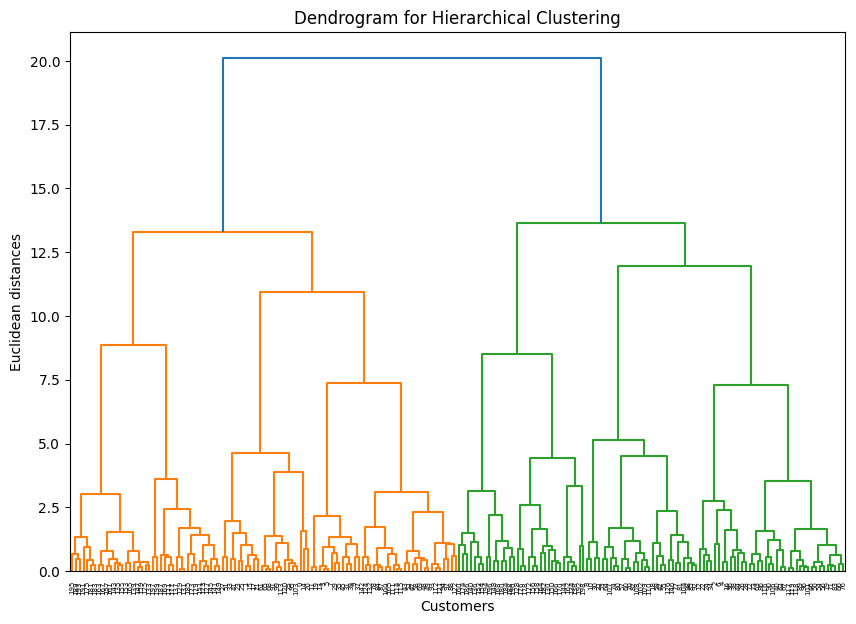

In [ ]:
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

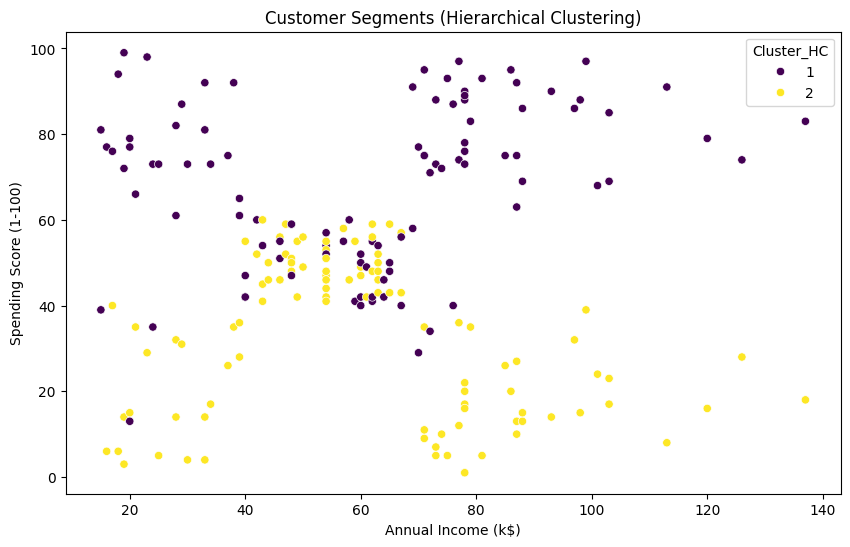

In [ ]:
threshold = 15
data['Cluster_HC'] = fcluster(Z, threshold, criterion='distance')

# Analyze the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_HC', palette='viridis')
plt.title('Customer Segments (Hierarchical Clustering)')
plt.show()

DBSCAN

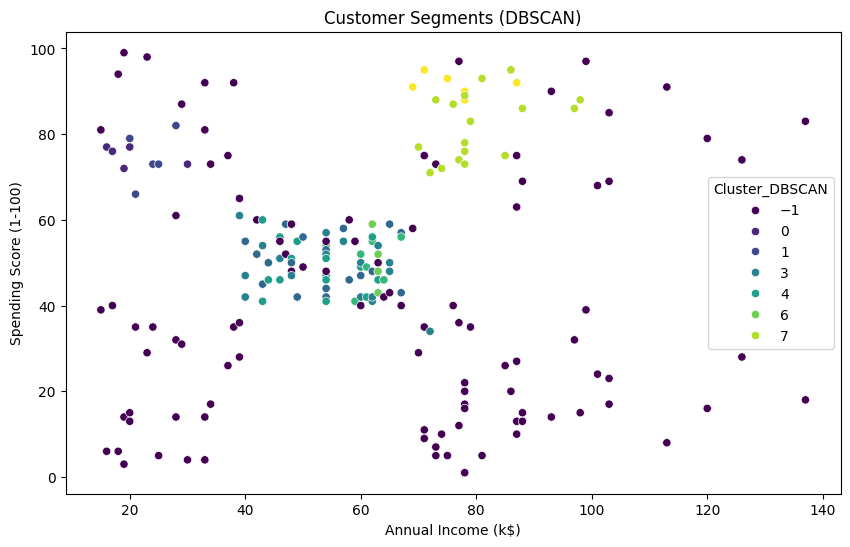

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['Cluster_DBSCAN'] = dbscan.fit_predict(data_scaled)

# Analyze the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_DBSCAN', palette='viridis')
plt.title('Customer Segments (DBSCAN)')
plt.show()

Gaussian Mixture Models (GMM)

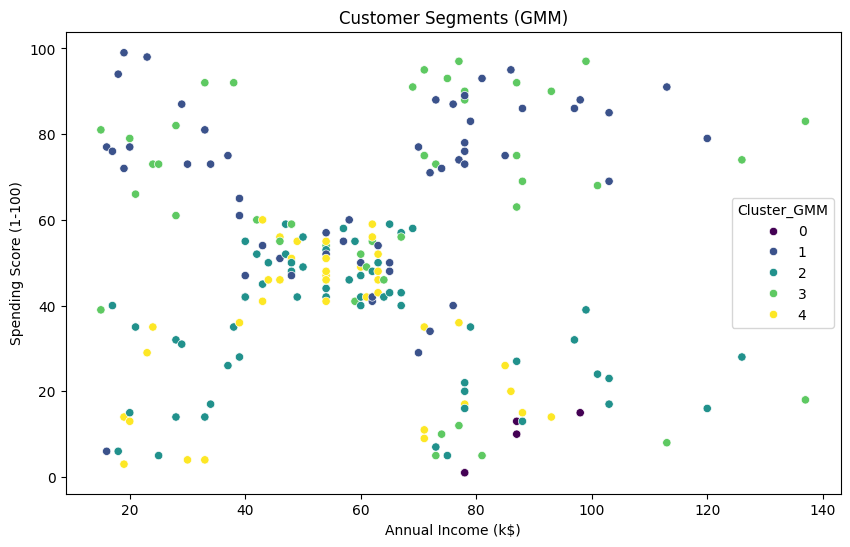

In [ ]:
gmm = GaussianMixture(n_components=optimal_clusters, random_state=0)
data['Cluster_GMM'] = gmm.fit_predict(data_scaled)

# Analyze the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_GMM', palette='viridis')
plt.title('Customer Segments (GMM)')
plt.show()


Display the cluster centers

In [ ]:
gmm_centers = scaler.inverse_transform(gmm.means_)
cluster_centers_gmm = pd.DataFrame(gmm_centers, columns=['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
print("GMM Cluster Centers:")
print(cluster_centers_gmm)

GMM Cluster Centers:
         Gender        Age  Annual Income (k$)  Spending Score (1-100)
0  1.110223e-16  38.570555           85.550594                7.945997
1  1.000000e+00  28.088017           59.749931               68.728830
2  1.000000e+00  47.083840           58.801239               36.085418
3 -2.220446e-16  27.574055           66.175242               64.005056
4  4.440892e-16  54.138006           54.674654               35.739961


Visulaize the cluster centers

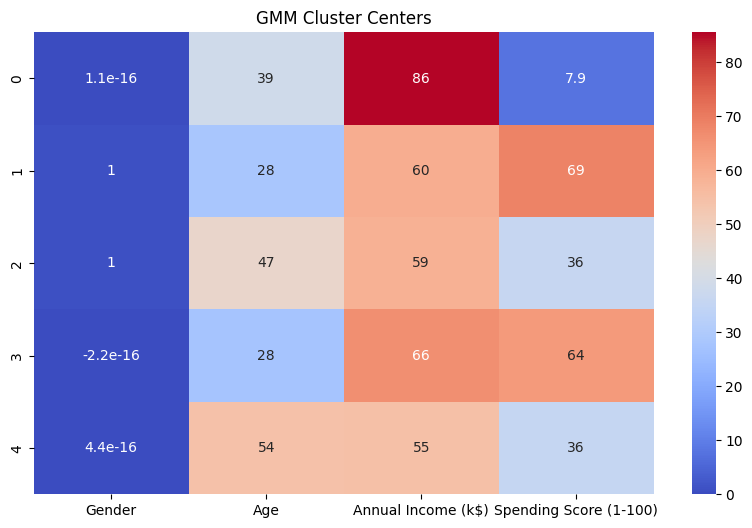

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_centers_gmm, annot=True, cmap='coolwarm', xticklabels=['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
plt.title('GMM Cluster Centers')
plt.show()


In [ ]:
silhouette_kmeans = silhouette_score(data_scaled, data['Cluster_KMeans'])
silhouette_hc = silhouette_score(data_scaled, data['Cluster_HC'])
silhouette_dbscan = silhouette_score(data_scaled, data['Cluster_DBSCAN']) if len(set(data['Cluster_DBSCAN'])) > 1 else -1
silhouette_gmm = silhouette_score(data_scaled, data['Cluster_GMM'])

print(f"Silhouette Score (K-Means): {silhouette_kmeans}")
print(f"Silhouette Score (Hierarchical Clustering): {silhouette_hc}")
print(f"Silhouette Score (DBSCAN): {silhouette_dbscan}")
print(f"Silhouette Score (GMM): {silhouette_gmm}")

Silhouette Score (K-Means): 0.31580529549543246
Silhouette Score (Hierarchical Clustering): 0.24177953745462927
Silhouette Score (DBSCAN): 0.012015057781900517
Silhouette Score (GMM): 0.24692798708736752
